In [1]:
import os
import glob
from fastai.vision import *
from fastai.metrics import error_rate

import matplotlib.pyplot as plt
%matplotlib inline

# Load some test data

In [2]:
test_sample = np.load('data/training_data-1.npy', allow_pickle=True)
test_img = test_sample[0][0]
test_controls = test_sample[0][1]
print(test_img.shape)
print(test_controls)

(270, 480, 3)
[-1.0, 0.289, 0.053, -0.005, 0, 0, 0, 0, 0, 0]


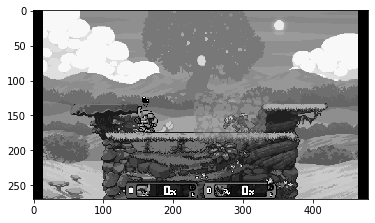

In [3]:
plt.imshow(test_img)

# Loss Function

In [4]:
def customized_loss(y_true, y_pred, loss='euclidean'):
    if loss == 'L2':
        L2_norm_cost = 0.001
        val = torch.mean(((y_pred - y_true)**2), axis=-1) + sum(y_pred**2)/2 * L2_norm_cost
    # Euclidean distance loss
    elif loss == 'euclidean':
        val = torch.sqrt(torch.sum((torch.FloatTensor(y_pred) - torch.FloatTensor(y_true)**2)))
        print(val)
        return val

In [5]:
# Test output
pred_controls = [-0.300, -0.349, 0, 1, 1, 0, 1, 1, 1, 0]
print(test_controls)
print(pred_controls)

[-1.0, 0.289, 0.053, -0.005, 0, 0, 0, 0, 0, 0]
[-0.3, -0.349, 0, 1, 1, 0, 1, 1, 1, 0]


In [6]:
customized_loss(test_controls, pred_controls)

tensor(1.8068)


tensor(1.8068)

# Model 

In [7]:
help(nn.Conv2d)

Help on class Conv2d in module torch.nn.modules.conv:

class Conv2d(_ConvNd)
 |  Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
 |  
 |  Applies a 2D convolution over an input signal composed of several input
 |  planes.
 |  
 |  In the simplest case, the output value of the layer with input size
 |  :math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
 |  can be precisely described as:
 |  
 |  .. math::
 |      \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
 |      \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)
 |  
 |  
 |  where :math:`\star` is the valid 2D `cross-correlation`_ operator,
 |  :math:`N` is a batch size, :math:`C` denotes a number of channels,
 |  :math:`H` is a height of input planes in pixels, and :math:`W` is
 |  width in pixels.
 |  
 |  * :attr:`stride` controls the str

# Constants

In [15]:
OUT_SHAPE = 10 # Vector of len 10 where each element is a value for a control output
INPUT_SHAPE = test_img.shape
WIDTH = INPUT_SHAPE[1]
HEIGHT = INPUT_SHAPE[0]
print(INPUT_SHAPE)
print(WIDTH)
print(HEIGHT)
bs = 50

(270, 480, 3)
480
270


# Data Setup

In [10]:
# Handy function to properly sort files
def order_files_by_date(path_to_folder, file_type):
    files = glob.glob("%s*%s" % (path_to_folder, file_type))
    files.sort(key=os.path.getmtime)
    return files

In [11]:
train_data = test_sample

In [12]:
train = train_data[:-5000]
test = train_data[-5000:]
print(len(train))
print(len(test))

46177
5000


In [40]:
X = torch.tensor([i[0] for i in train])
Y = [i[1] for i in train]

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 17953617600 bytes. Buy new RAM!


In [17]:
test_x = np,array([i[0] for i in test])
test_y = [i[1] for i in test]

# Model Definition

In [18]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [19]:
net = Net().to(device)

NameError: name 'Net' is not defined